In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
options = {
    'model' : 'cfg/yolo.cfg',
    'load' : 'bin/yolov2.weights',
    'threshold' : 0.3,
    #'gpu' : 1.0
}
tfnet = TFNet(options)

C:\Users\zeus\Desktop\yolo\darkflow-master\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.04734349250793457s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bn

In [3]:
img = cv2.imread('1.jpg')
result = tfnet.return_predict(img)
print(result)
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[{'label': 'person', 'confidence': 0.44015926, 'topleft': {'x': 537, 'y': 90}, 'bottomright': {'x': 559, 'y': 124}}, {'label': 'person', 'confidence': 0.6959391, 'topleft': {'x': 494, 'y': 108}, 'bottomright': {'x': 531, 'y': 181}}, {'label': 'person', 'confidence': 0.75123245, 'topleft': {'x': 13, 'y': 0}, 'bottomright': {'x': 543, 'y': 539}}, {'label': 'person', 'confidence': 0.64387083, 'topleft': {'x': 323, 'y': 190}, 'bottomright': {'x': 697, 'y': 524}}]


In [4]:
lenh = len(result)

In [25]:
from collections import defaultdict
center = defaultdict()
def centi(a1,b1,a2,b2):
    l = b2-b1
    r = a2-a1
    return l//2,r//2
#center 

for i in range(0,lenh):
    tl = (result[i]['topleft']['x'],result[i]['topleft']['y'])
    br =(result[i]['bottomright']['x'],result[i]['bottomright']['y'])
    label = result[i]['label']
    img = cv2.rectangle(img,tl,br,(0,255,0),1)
    a,b = centi(tl[0],tl[1],br[0],br[1])
    center['{} + {}'.format(label,i)] = [a,b]
    img = cv2.putText(img, label,tl,cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),1)
#cv2.imshow('image',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


In [29]:
print(list(center))
a = (list(center.values()))
a

['person + 0', 'person + 1', 'person + 2', 'person + 3']


[[17, 11], [36, 18], [269, 265], [167, 187]]

In [40]:
import numpy as np
import hdbscan
rads = np.radians(a)
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='haversine')
cluster_labels = clusterer.fit_predict(a)
print(cluster_labels)
print(clusterer)
print(clusterer.labels_.max())
print(clusterer.probabilities_)

[-1 -1 -1 -1]
HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='haversine', min_cluster_size=2, min_samples=None, p=None,
    prediction_data=False)
-1
[0. 0. 0. 0.]


In [55]:
a = (list(center.values()))
a
for x,y in center.values():
    print(x,y)

17 11
36 18
269 265
167 187


In [45]:
from sklearn.datasets import make_blobs
import pandas as pd
blobs, labels = make_blobs(n_samples=4, n_features=1)
clusterer = hdbscan.HDBSCAN()
clusterer.fit(blobs)
clusterer.labels_

array([-1, -1, -1, -1], dtype=int64)

In [61]:
import numpy
h = numpy.array(center.values())
h

array(dict_values([[17, 11], [36, 18], [269, 265], [167, 187]]),
      dtype=object)

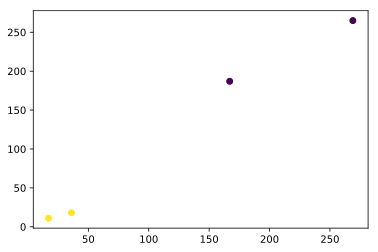

[1 1 0 0]


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten

coordinates= np.array([
           [17,11],
           [36,18],
           [269,265],[167,187] ])
x, y = kmeans2(whiten(coordinates), 2, iter = 4)
plt.scatter(coordinates[:,0], coordinates[:,1], c=y);
plt.show()
print(y)